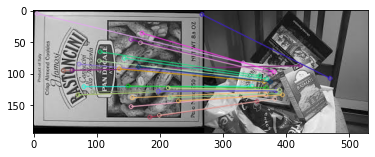

(<matplotlib.image.AxesImage at 0x19daee5ce80>, None)

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img1 = cv.imread("C:\\Image_Analysis_CV\\Image_Analysis_CV\\images\\box.jpg",cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread("C:\\Image_Analysis_CV\\Image_Analysis_CV\\images\\box_schene.jpg",cv.IMREAD_GRAYSCALE) # trainImage
# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()